<a href="https://colab.research.google.com/github/mercury2303/Garment-Worker-Productivity-Prediction/blob/main/HubbleMind's_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#HubbleMind Internship
#ML PRoject 1
#This project is based on HubbleMind's Machine Learning Internship

In [4]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('garments_worker_productivity.csv')
data=pd.DataFrame(data)
print("done by Hardik Gulati")
data

done by Hardik Gulati


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [5]:
# prompt: Using dataframe data: clean the data

import pandas as pd

# Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Handle missing values in 'date' - remove rows with invalid dates
data.dropna(subset=['date'], inplace=True)

# Check data types and handle other potential issues as needed

# Example: If 'quarter' has inconsistent capitalization, convert to uppercase
data['quarter'] = data['quarter'].str.upper()

# Example: if 'department' has typos
data['department'] = data['department'].replace({'sweing': 'sewing'})

# Example: If 'team' should be categorical, convert
#data['team'] = data['team'].astype('category')

data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,QUARTER1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,QUARTER1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,QUARTER1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,QUARTER1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,QUARTER1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,QUARTER2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,QUARTER2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,QUARTER2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,QUARTER2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [6]:
data.info()
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

# Check the distribution of
print("\nDistribution of Key Columns:")
for column in ['date','actual_productivity']:  # Replace with actual column names
    print(f"\nDistribution of {column}:")
    print(data[column].value_counts())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [7]:
# Check for missing values in 'wip' column
print(f"Missing values in 'wip': {data['wip'].isnull().sum()}")

# Impute missing values with the median
data['wip'].fillna(data['wip'].median(), inplace=True)

# Verify if missing values are handled
print(f"Missing values in 'wip' after imputation: {data['wip'].isnull().sum()}")

data

Missing values in 'wip': 506
Missing values in 'wip' after imputation: 0


<ipython-input-7-67ad11a4ac93>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['wip'].fillna(data['wip'].median(), inplace=True)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,QUARTER1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,QUARTER1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,QUARTER1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,QUARTER1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,QUARTER1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,QUARTER2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,QUARTER2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,QUARTER2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,QUARTER2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [8]:
# Function to detect and manage outliers using the IQR method
def handle_outliers(column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nOutliers in '{column}':")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Replace outliers with boundaries
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply outlier handling for specific columns
for col in ['idle_time', 'incentive', 'actual_productivity']:
    if col in data.columns:  # Ensure column exists
        handle_outliers(col)
    else:
        print(f"Column '{col}' not found in the dataset.")

data


Outliers in 'idle_time':
Lower Bound: 0.0, Upper Bound: 0.0

Outliers in 'incentive':
Lower Bound: -75.0, Upper Bound: 125.0

Outliers in 'actual_productivity':
Lower Bound: 0.35038907, Upper Bound: 1.150170598


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,QUARTER1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98.0,0.0,0,0,59.0,0.940725
1,2015-01-01,QUARTER1,finishing,Thursday,1,0.75,3.94,1039.0,960,0.0,0.0,0,0,8.0,0.886500
2,2015-01-01,QUARTER1,sewing,Thursday,11,0.80,11.41,968.0,3660,50.0,0.0,0,0,30.5,0.800570
3,2015-01-01,QUARTER1,sewing,Thursday,12,0.80,11.41,968.0,3660,50.0,0.0,0,0,30.5,0.800570
4,2015-01-01,QUARTER1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50.0,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,QUARTER2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0.0,0.0,0,0,8.0,0.628333
1193,2015-03-11,QUARTER2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0.0,0.0,0,0,8.0,0.625625
1194,2015-03-11,QUARTER2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0.0,0.0,0,0,8.0,0.625625
1195,2015-03-11,QUARTER2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0.0,0.0,0,0,15.0,0.505889


In [9]:
# One-hot encode categorical features
categorical_features = ['quarter', 'department']  # Replace with your actual categorical column names

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("\nDataset after one-hot encoding:")
print(data.head())





Dataset after one-hot encoding:
        date       day  team  targeted_productivity    smv     wip  over_time  \
0 2015-01-01  Thursday     8                   0.80  26.16  1108.0       7080   
1 2015-01-01  Thursday     1                   0.75   3.94  1039.0        960   
2 2015-01-01  Thursday    11                   0.80  11.41   968.0       3660   
3 2015-01-01  Thursday    12                   0.80  11.41   968.0       3660   
4 2015-01-01  Thursday     6                   0.80  25.90  1170.0       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0       98.0        0.0         0                   0           59.0   
1        0.0        0.0         0                   0            8.0   
2       50.0        0.0         0                   0           30.5   
3       50.0        0.0         0                   0           30.5   
4       50.0        0.0         0                   0           56.0   

   actual_productivity  quarter_QUARTER2  quart

In [10]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract useful date features
data['month'] = data['date'].dt.month  # Extract month (1-12)
data['day_of_week'] = data['date'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)

print("\nDataset after extracting date features:")
print(data[['date', 'month', 'day_of_week']].head())
data


Dataset after extracting date features:
        date  month  day_of_week
0 2015-01-01      1            3
1 2015-01-01      1            3
2 2015-01-01      1            3
3 2015-01-01      1            3
4 2015-01-01      1            3


,date,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_QUARTER2,quarter_QUARTER3,quarter_QUARTER4,quarter_QUARTER5,department_sewing,month,day_of_week
0,2015-01-01,Thursday,8,0.80,26.16,1108.0,7080,98.0,0.0,0,0,59.0,0.940725,False,False,False,False,True,1,3
1,2015-01-01,Thursday,1,0.75,3.94,1039.0,960,0.0,0.0,0,0,8.0,0.886500,False,False,False,False,False,1,3
2,2015-01-01,Thursday,11,0.80,11.41,968.0,3660,50.0,0.0,0,0,30.5,0.800570,False,False,False,False,True,1,3
3,2015-01-01,Thursday,12,0.80,11.41,968.0,3660,50.0,0.0,0,0,30.5,0.800570,False,False,False,False,True,1,3
4,2015-01-01,Thursday,6,0.80,25.90,1170.0,1920,50.0,0.0,0,0,56.0,0.800382,False,False,False,False,True,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Wednesday,10,0.75,2.90,1039.0,960,0.0,0.0,0,0,8.0,0.628333,True,False,False,False,False,3,2
1193,2015-03-11,Wednesday,8,0.70,3.90,1039.0,960,0.0,0.0,0,0,8.0,0.625625,True,False,False,False,False,3,2
1194,2015-03-11,Wednesday,7,0.65,3.90,1039.0,960,0.0,0.0,0,0,8.0,0.625625,True,False,False,False,False,3,2
1195,2015-03-11,Wednesday,9,0.75,2.90,1039.0,1800,0.0,0.0,0,0,15.0,0.505889,True,False,False,False,False,3,2


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['smv', 'over_time']  # Replace with your actual numerical column names

# Apply scaling only to the specified columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Check the scaled values
print("\nScaled Numerical Features:")
print(data[numerical_features].head())




Scaled Numerical Features:
        smv  over_time
0  1.014552   0.750589
1 -1.016778  -1.077682
2 -0.333878  -0.271092
3 -0.333878  -0.271092
4  0.990783  -0.790895


Missing values in 'actual_productivity': 0

Descriptive Statistics for 'actual_productivity':
count    1197.000000
mean        0.737397
std         0.168772
min         0.350389
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


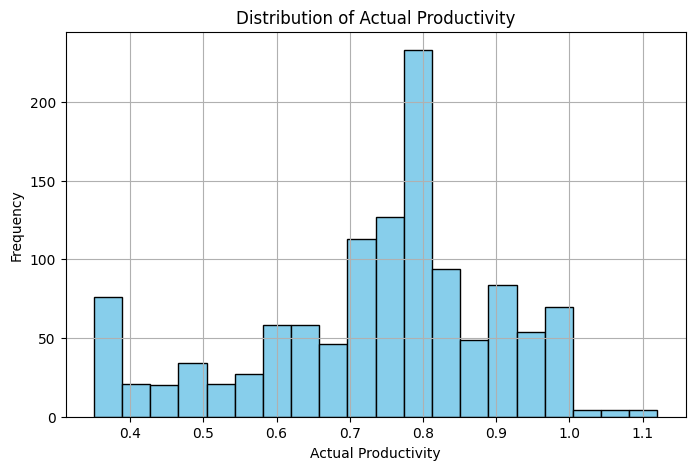

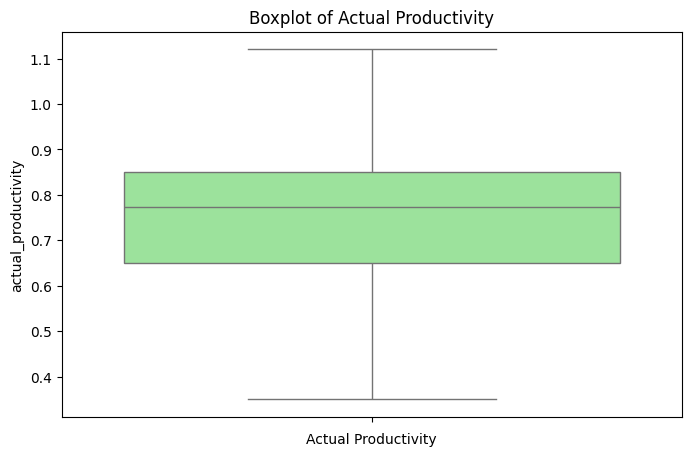

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in the column
print("Missing values in 'actual_productivity':", data['actual_productivity'].isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics for 'actual_productivity':")
print(data['actual_productivity'].describe())

# Plot a histogram
plt.figure(figsize=(8, 5))
plt.hist(data['actual_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data['actual_productivity'], color='lightgreen')
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.show()


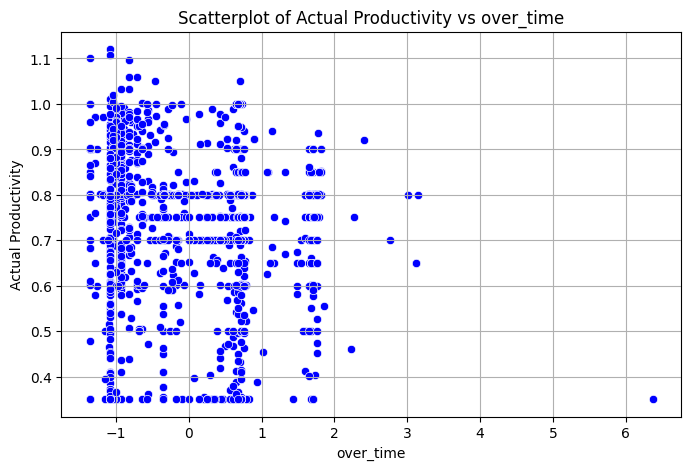

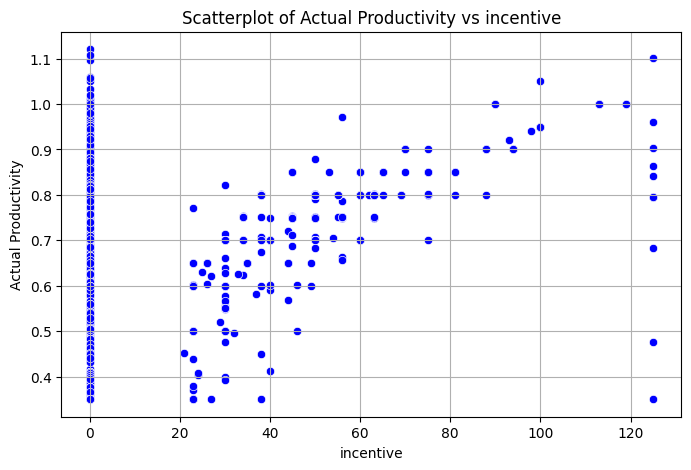

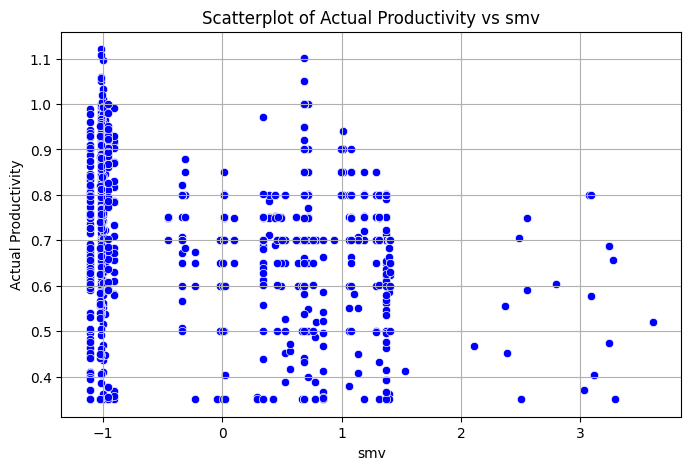

<ipython-input-13-f18d03667f61>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data['actual_productivity'], palette='viridis')


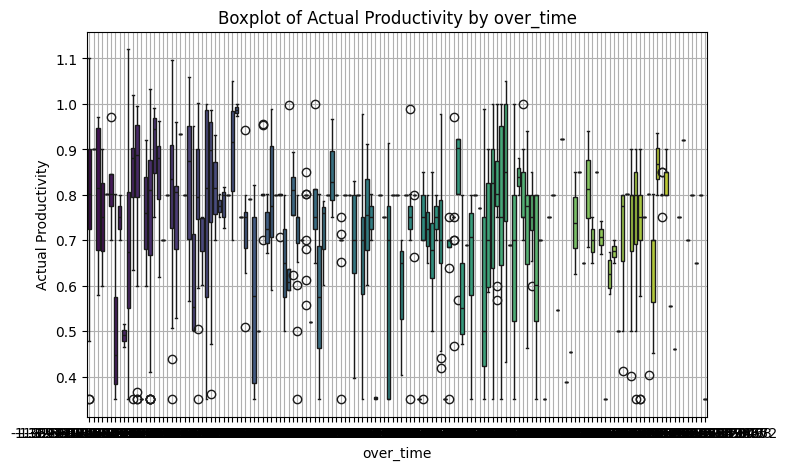

<ipython-input-13-f18d03667f61>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data['actual_productivity'], palette='viridis')


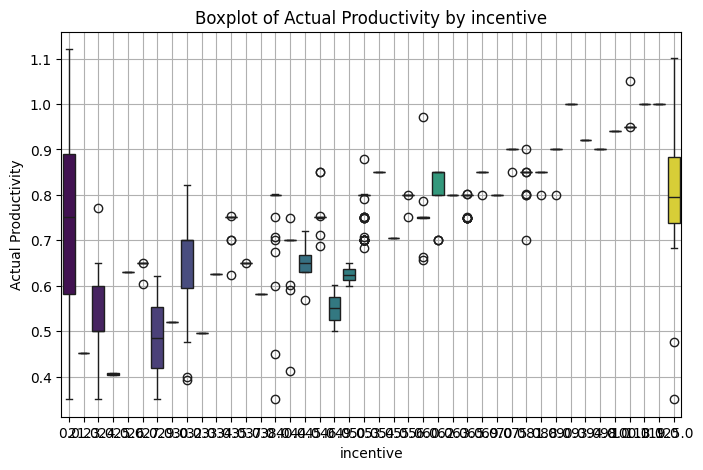

<ipython-input-13-f18d03667f61>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data['actual_productivity'], palette='viridis')


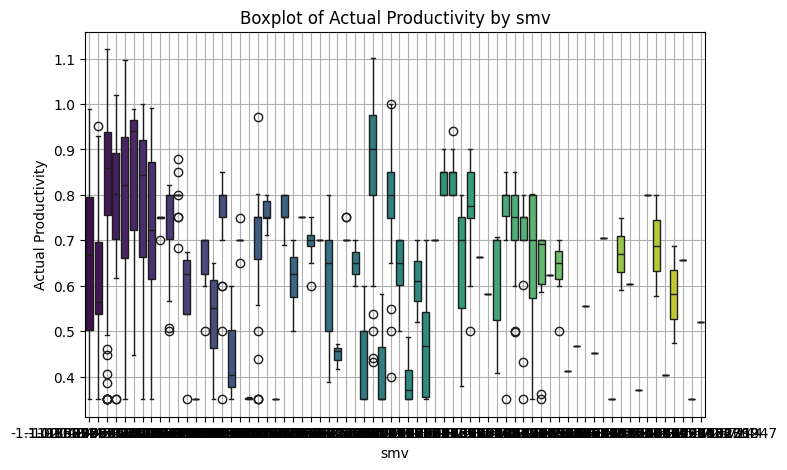

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplots to observe trends and relationships
features = ['over_time', 'incentive', 'smv']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data['actual_productivity'], color='blue')
    plt.title(f'Scatterplot of Actual Productivity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Actual Productivity')
    plt.grid(True)
    plt.show()

# Boxplots to examine distribution and outliers
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[feature], y=data['actual_productivity'], palette='viridis')
    plt.title(f'Boxplot of Actual Productivity by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Actual Productivity')
    plt.grid(True)
    plt.show()


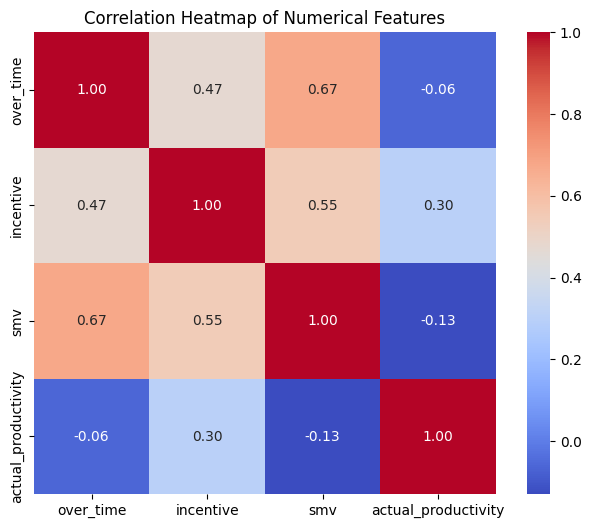

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features and the target variable
numerical_features = ['over_time', 'incentive', 'smv', 'actual_productivity']  # Add other numerical columns as needed

# Compute the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [15]:
# Check for datetime columns
datetime_columns = data.select_dtypes(include=["datetime64[ns]"]).columns

# Convert datetime columns into useful features
for col in datetime_columns:
    data[f"{col}_year"] = data[col].dt.year
    data[f"{col}_month"] = data[col].dt.month
    data[f"{col}_day"] = data[col].dt.day
    data[f"{col}_dayofweek"] = data[col].dt.dayofweek

# Drop the original datetime columns
data = data.drop(columns=datetime_columns)

# Ensure there are no datetime columns left
print(data.dtypes)


day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
quarter_QUARTER2            bool
quarter_QUARTER3            bool
quarter_QUARTER4            bool
quarter_QUARTER5            bool
department_sewing           bool
month                      int32
day_of_week                int32
date_year                  int32
date_month                 int32
date_day                   int32
date_dayofweek             int32
dtype: object


In [16]:
# Assuming 'data' is the DataFrame containing your dataset
# Define feature set (X) and target (y)
X = data.drop(columns=['actual_productivity'])  # Replace 'target_column' with your target column name
y = data['actual_productivity']                 # Target column

# Ensure train-test split is defined
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns in X_train:", non_numeric_columns)

# Apply one-hot encoding for categorical columns
X_train = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_columns, drop_first=True)

# Align columns in case of mismatched dummy variables
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns in X_test with 0


Non-numeric columns in X_train: Index(['day'], dtype='object')


In [18]:
print("X_train types:\n", X_train.dtypes)
print("X_test types:\n", X_test.dtypes)


X_train types:
 team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
quarter_QUARTER2            bool
quarter_QUARTER3            bool
quarter_QUARTER4            bool
quarter_QUARTER5            bool
department_sewing           bool
month                      int32
day_of_week                int32
date_year                  int32
date_month                 int32
date_day                   int32
date_dayofweek             int32
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
dtype: object
X_test types:
 team                       int64
targeted_productivity    float64
smv                      float6

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Placeholder for performance metrics
results = []

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    })

    # Print performance for each model
    print(f"{name}:\n MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}\n")

# Convert results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Display all results
print(results_df)


Linear Regression:
 MAE: 0.0949, MSE: 0.0171, R²: 0.3159

Ridge Regression:
 MAE: 0.0951, MSE: 0.0171, R²: 0.3185

Lasso Regression:
 MAE: 0.1036, MSE: 0.0193, R²: 0.2278

Random Forest Regressor:
 MAE: 0.0684, MSE: 0.0111, R²: 0.5571

Gradient Boosting Regressor:
 MAE: 0.0754, MSE: 0.0128, R²: 0.4896

XGBoost Regressor:
 MAE: 0.0709, MSE: 0.0123, R²: 0.5085

Support Vector Regressor:
 MAE: 0.1177, MSE: 0.0228, R²: 0.0915

                         Model       MAE       MSE        R²
0            Linear Regression  0.094893  0.017139  0.315882
1             Ridge Regression  0.095106  0.017074  0.318482
2             Lasso Regression  0.103565  0.019346  0.227761
3      Random Forest Regressor  0.068358  0.011096  0.557093
4  Gradient Boosting Regressor  0.075375  0.012788  0.489560
5            XGBoost Regressor  0.070905  0.012314  0.508479
6     Support Vector Regressor  0.117748  0.022760  0.091489


Linear Regression: MAE=0.0949, MSE=0.0171, R²=0.3159
Ridge Regression: MAE=0.0951, MSE=0.0171, R²=0.3185
Lasso Regression: MAE=0.1036, MSE=0.0193, R²=0.2278
Random Forest Regressor: MAE=0.0684, MSE=0.0111, R²=0.5571
Gradient Boosting Regressor: MAE=0.0754, MSE=0.0128, R²=0.4896
XGBoost Regressor: MAE=0.0709, MSE=0.0123, R²=0.5085
Support Vector Regressor: MAE=0.1177, MSE=0.0228, R²=0.0915


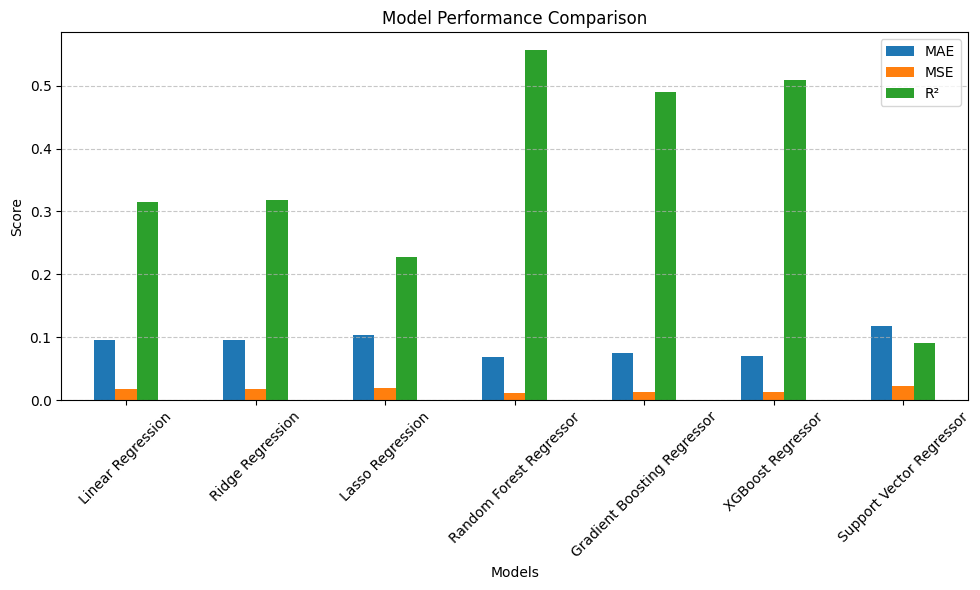

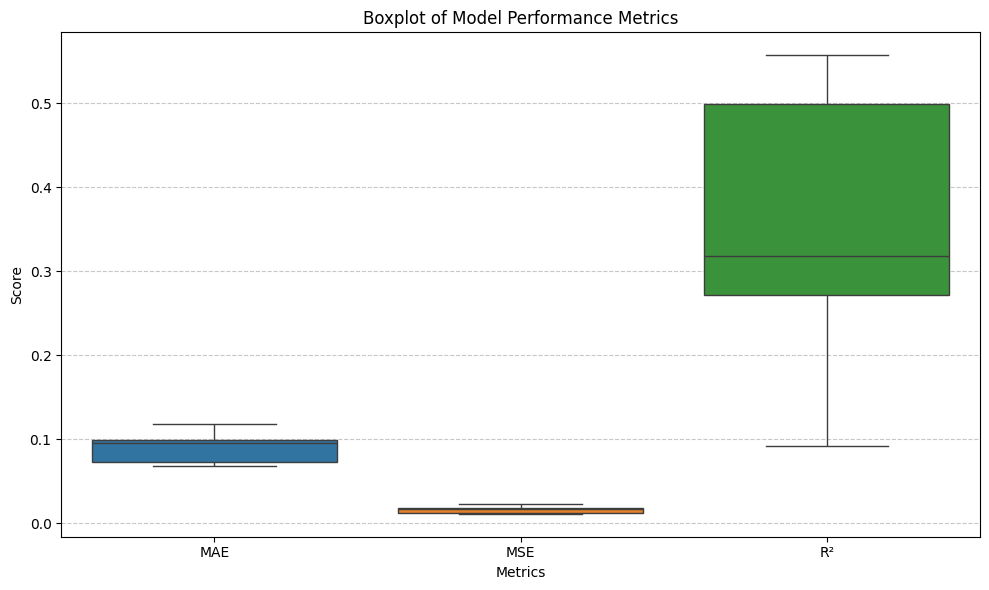

In [20]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store evaluation metrics
metrics = {}

for name, model in models.items():
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    metrics[name] = [mae, mse, r2]

# Display metrics for verification
for model_name, scores in metrics.items():
    print(f"{model_name}: MAE={scores[0]:.4f}, MSE={scores[1]:.4f}, R²={scores[2]:.4f}")



import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
metrics_df = pd.DataFrame(metrics).T  # Convert metrics dictionary to DataFrame
metrics_df.columns = ['MAE', 'MSE', 'R²']

# Bar Chart
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Boxplot (optional for variability visualization)
plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_df)
plt.title('Boxplot of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


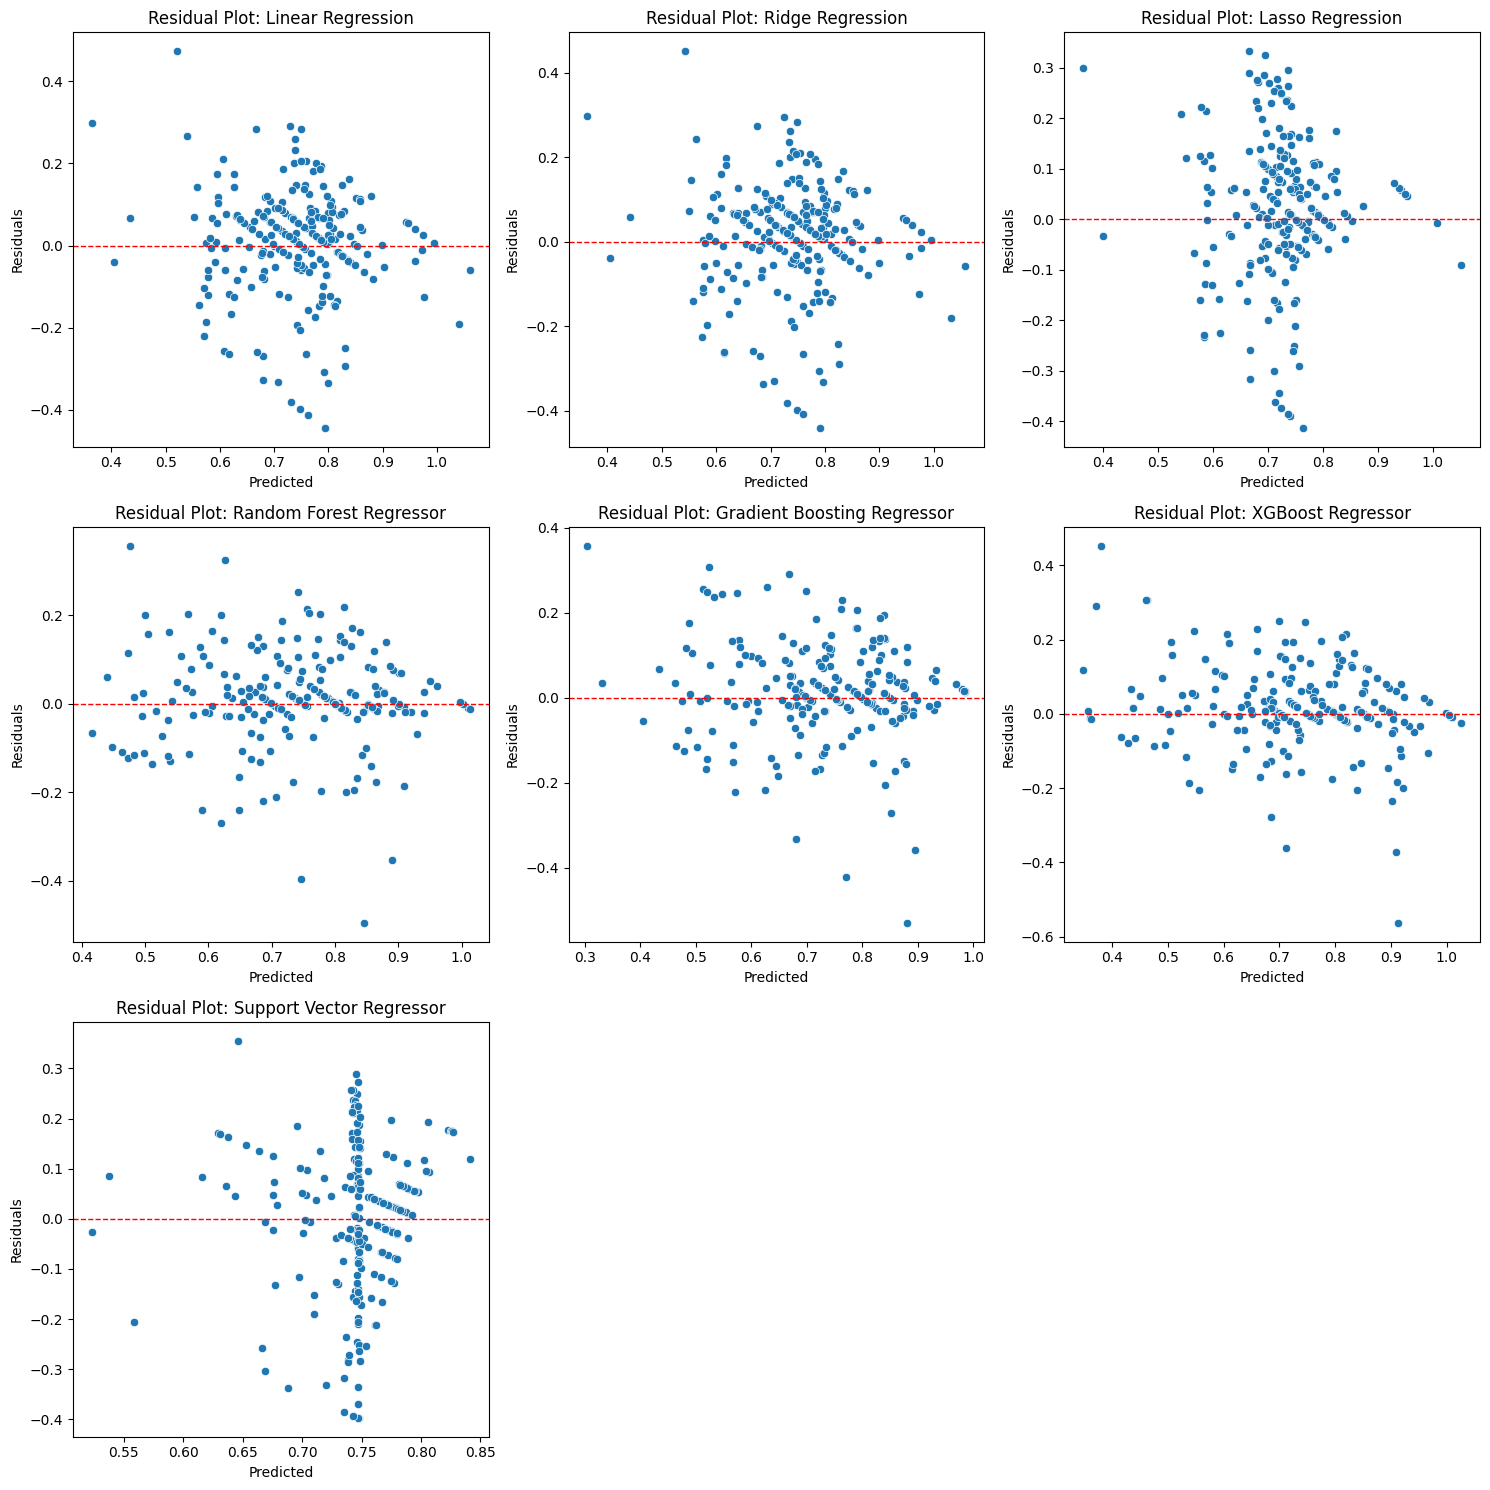

In [21]:
import seaborn as sns
import math

# Determine number of models
num_models = len(models)

# Dynamically calculate rows and columns for subplots
ncols = 3
nrows = math.ceil(num_models / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    sns.scatterplot(x=y_pred, y=residuals, ax=axes[i])
    axes[i].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[i].set_title(f'Residual Plot: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Residuals')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Random Forest Parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Parameters
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# XGBoost Parameters
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Define models
models = {
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}


In [23]:
# Create dictionaries to store the best models and parameters
best_models = {}
best_params = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")

    if name == "RandomForest":
        param_grid = rf_param_grid
    elif name == "GradientBoosting":
        param_grid = gb_param_grid
    elif name == "XGBoost":
        param_grid = xgb_param_grid

    # Use GridSearchCV for parameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Store the best model and parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Tuning hyperparameters for RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tuning hyperparameters for GradientBoosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 5}


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in best_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}\n")


Evaluating RandomForest...
RandomForest Performance:
  MAE: 0.0692
  MSE: 0.0115
  R²: 0.5420

Evaluating GradientBoosting...
GradientBoosting Performance:
  MAE: 0.0727
  MSE: 0.0132
  R²: 0.4738

Evaluating XGBoost...
XGBoost Performance:
  MAE: 0.0723
  MSE: 0.0128
  R²: 0.4910



In [25]:
# Train the original models (if not already done)
for name, model in models.items():
    print(f"Fitting original model: {name}...")
    model.fit(X_train, y_train)


Fitting original model: RandomForest...
Fitting original model: GradientBoosting...
Fitting original model: XGBoost...


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Store metrics for comparison
performance_before_after = {
    "Model": [],
    "Metric": [],
    "Before_Tuning": [],
    "After_Tuning": []
}

# Evaluate each tuned model
for name, model in best_models.items():
    print(f"Evaluating {name}...")

    # Predictions on test set
    y_pred_tuned = model.predict(X_test)
    y_pred_original = models[name].predict(X_test)  # Original (untuned) model predictions

    # Metrics for tuned model
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    r2_tuned = r2_score(y_test, y_pred_tuned)

    # Metrics for original model
    mae_original = mean_absolute_error(y_test, y_pred_original)
    mse_original = mean_squared_error(y_test, y_pred_original)
    r2_original = r2_score(y_test, y_pred_original)

    # Append metrics to the comparison table
    performance_before_after["Model"].append(name)
    performance_before_after["Metric"].append("MAE")
    performance_before_after["Before_Tuning"].append(mae_original)
    performance_before_after["After_Tuning"].append(mae_tuned)

    performance_before_after["Model"].append(name)
    performance_before_after["Metric"].append("MSE")
    performance_before_after["Before_Tuning"].append(mse_original)
    performance_before_after["After_Tuning"].append(mse_tuned)

    performance_before_after["Model"].append(name)
    performance_before_after["Metric"].append("R²")
    performance_before_after["Before_Tuning"].append(r2_original)
    performance_before_after["After_Tuning"].append(r2_tuned)

    print(f"Metrics for {name} (After Tuning):")
    print(f"  MAE: {mae_tuned:.4f}, MSE: {mse_tuned:.4f}, R²: {r2_tuned:.4f}\n")


Evaluating RandomForest...
Metrics for RandomForest (After Tuning):
  MAE: 0.0692, MSE: 0.0115, R²: 0.5420

Evaluating GradientBoosting...
Metrics for GradientBoosting (After Tuning):
  MAE: 0.0727, MSE: 0.0132, R²: 0.4738

Evaluating XGBoost...
Metrics for XGBoost (After Tuning):
  MAE: 0.0723, MSE: 0.0128, R²: 0.4910



              Model Metric  Before_Tuning  After_Tuning
0      RandomForest    MAE       0.068318      0.069177
1      RandomForest    MSE       0.011214      0.011474
2      RandomForest     R²       0.552375      0.542000
3  GradientBoosting    MAE       0.075680      0.072651
4  GradientBoosting    MSE       0.012858      0.013183


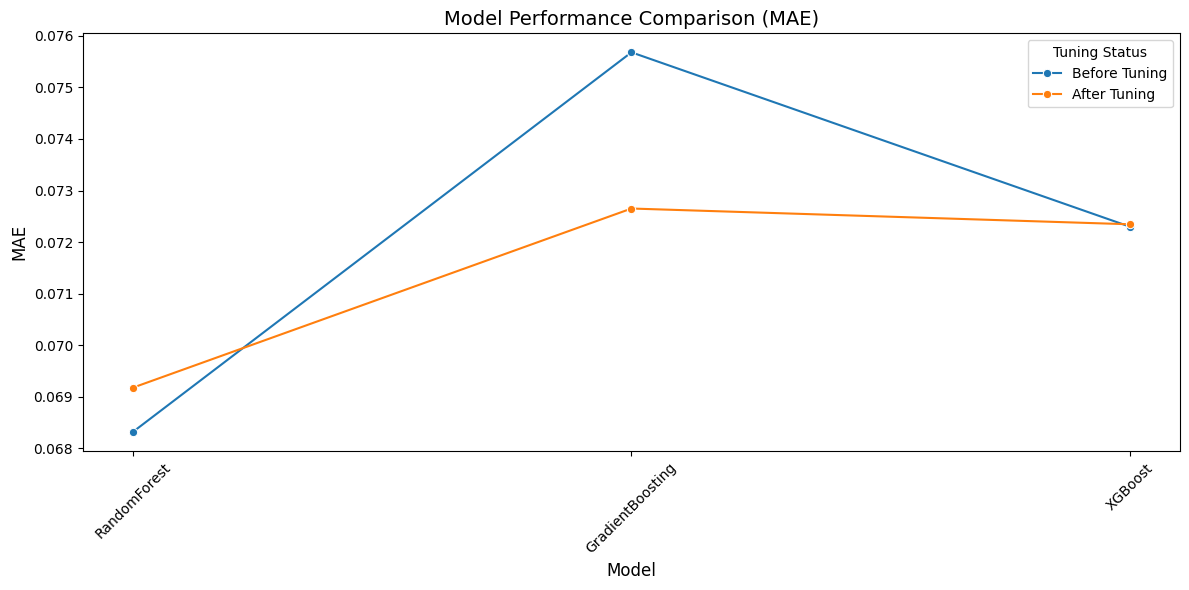

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming performance_before_after is a dictionary with model performance data
performance_df = pd.DataFrame(performance_before_after)

# Check the structure of the DataFrame
print(performance_df.head())

# Plot the performance comparison: Before and After tuning
plt.figure(figsize=(12, 6))

# MAE comparison
sns.lineplot(
    data=performance_df[performance_df['Metric'] == 'MAE'],
    x="Model", y="Before_Tuning", label="Before Tuning", marker="o"
)
sns.lineplot(
    data=performance_df[performance_df['Metric'] == 'MAE'],
    x="Model", y="After_Tuning", label="After Tuning", marker="o"
)

# Adding labels and title
plt.title('Model Performance Comparison (MAE)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend(title='Tuning Status')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Repeat similar plots for MSE and R² if needed


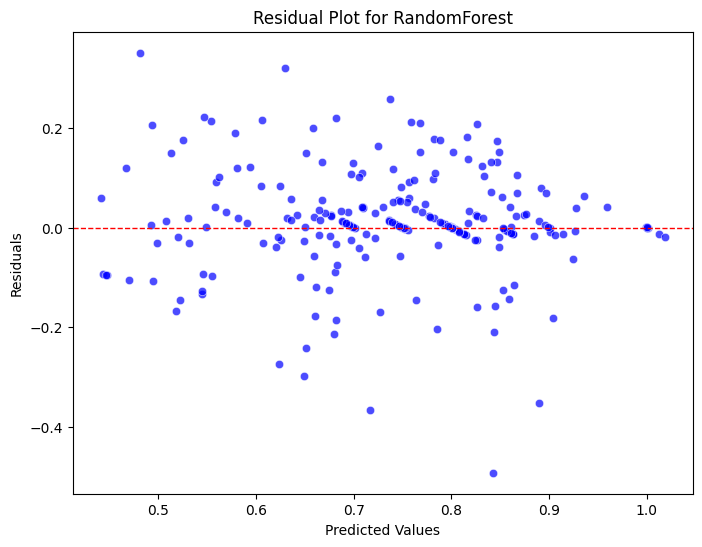

In [28]:
# Identify the best-performing model (example: XGBoost)
best_model_name = max(best_models, key=lambda x: r2_score(y_test, best_models[x].predict(X_test)))
best_model = best_models[best_model_name]

# Calculate residuals
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_best, y=residuals, color="blue", alpha=0.7)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title(f"Residual Plot for {best_model_name}")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [29]:
import joblib

# Save the trained model (e.g., Random Forest)
joblib.dump(best_model, '/content/productivity_predictor.pkl')

# Load the model
model = joblib.load('/content/productivity_predictor.pkl')


In [30]:
import pandas as pd

def predict_productivity(input_data):
    """
    Predict productivity based on user input.

    Args:
        input_data (dict): Dictionary containing user input.

    Returns:
        float: Predicted productivity.
    """
    # Convert input dictionary to a DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure any necessary preprocessing (if needed)
    # For example: handling categorical data, scaling, etc.

    # Predict using the loaded model
    prediction = model.predict(input_df)
    return prediction[0]


In [31]:
def predict_productivity(input_data):
    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply the same preprocessing steps as training
    input_df['date'] = pd.to_datetime(input_df['date'])
    input_df['date_year'] = input_df['date'].dt.year
    input_df['date_month'] = input_df['date'].dt.month
    input_df['date_day'] = input_df['date'].dt.day
    input_df['date_dayofweek'] = input_df['date'].dt.dayofweek
    input_df['day'] = input_df['date'].dt.day_name()

    input_df.drop(columns=['date'], inplace=True)

    # One-hot encode categorical features using training pipeline
    input_encoded = pd.get_dummies(input_df, columns=['department', 'quarter', 'day'], drop_first=True)

    # Align columns with the training dataset
    missing_cols = set(X_train_encoded.columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0
    input_encoded = input_encoded[X_train_encoded.columns]

    # Predict using the trained model
    prediction = final_model.predict(input_encoded)
    return prediction[0]


In [38]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets for user input
quarter = widgets.Dropdown(options=["Q1", "Q2", "Q3", "Q4"], description='Quarter:')
department = widgets.Dropdown(options=["sewing", "finishing"], description='Department:')
team = widgets.IntText(value=3, description='Team:')
targeted_productivity = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='Target:')
smv = widgets.FloatText(value=12.5, description='SMV:')
wip = widgets.FloatText(value=25.0, description='WIP:')
over_time = widgets.IntText(value=120, description='Over Time:')
incentive = widgets.FloatText(value=200.0, description='Incentive:')
idle_time = widgets.FloatText(value=0.1, description='Idle Time:')
idle_men = widgets.IntText(value=2, description='Idle Men:')
no_of_style_change = widgets.IntText(value=1, description='Style Changes:')
no_of_workers = widgets.IntText(value=25, description='Workers:')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Output widget to display results
output = widgets.Output()

# Prediction logic when button is clicked
def on_predict_clicked(b):
    # Prepare input data
    input_data = {
        "quarter": quarter.value,
        "department": department.value,
        "team": team.value,
        "targeted_productivity": targeted_productivity.value,
        "smv": smv.value,
        "wip": wip.value,
        "over_time": over_time.value,
        "incentive": incentive.value,
        "idle_time": idle_time.value,
        "idle_men": idle_men.value,
        "no_of_style_change": no_of_style_change.value,
        "no_of_workers": no_of_workers.value,
    }
    # Get prediction
    prediction = predict_productivity(input_data)

    # Display the result
    with output:
        output.clear_output()
        print(f"Predicted Productivity: {prediction}")

predict_button.on_click(on_predict_clicked)

# Display all widgets
display(quarter, department, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, predict_button, output)


Dropdown(description='Quarter:', options=('Q1', 'Q2', 'Q3', 'Q4'), value='Q1')

Dropdown(description='Department:', options=('sewing', 'finishing'), value='sewing')

IntText(value=3, description='Team:')

FloatSlider(value=0.5, description='Target:', max=1.0, step=0.01)

FloatText(value=12.5, description='SMV:')

FloatText(value=25.0, description='WIP:')

IntText(value=120, description='Over Time:')

FloatText(value=200.0, description='Incentive:')

FloatText(value=0.1, description='Idle Time:')

IntText(value=2, description='Idle Men:')

IntText(value=1, description='Style Changes:')

IntText(value=25, description='Workers:')

Button(description='Predict', style=ButtonStyle())

Output()